In [2]:
import cv2 as cv
import dlib
import numpy as np
import matplotlib.pyplot as plt


# Detcing Face 

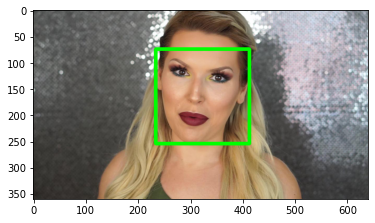

In [2]:
image_path = os.path.join(os.getcwd(), 'dataset','Lip_dataset','train_frames','train','00000007.jpg')
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv.resize(image, (0,0),None , 0.5, 0.5)
img_original = image.copy()

plt.imshow(img_original)

detector = dlib.get_frontal_face_detector()
imgGray = cv.cvtColor(img_original, cv.COLOR_RGB2GRAY)
faces = detector(imgGray)


for face in faces:
    x1, y1 = face.left(), face.top()
    x2, y2 = face.right(), face.bottom()

    img_original__ = cv.rectangle(img_original, (x1, y1), (x2, y2), (0, 255 ,0), 5)

    plt.imshow(img_original__)


# Facial Landmark

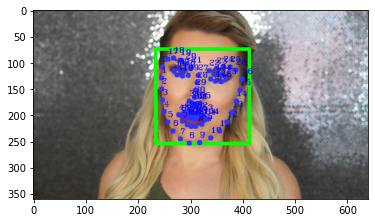

In [3]:
predictor = dlib.shape_predictor('dataset/shape_predictor_68_face_landmarks.dat')
landmark_point = []

for face in faces:
    x1, y1 = face.left(), face.top()
    x2, y2 = face.right(), face.bottom()

    img_original__ = cv.rectangle(img_original, (x1,y1), (x2, y2), (0, 255, 0), 2)
    landmarks = predictor(imgGray, face)
    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmark_point.append((x,y))
        cv.circle(img_original__, (x,y), 5, (50, 50 , 255), cv.FILLED)
        cv.putText(img_original__, str(n), (x, y - 10), cv.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0, 0, 255), 1)

plt.imshow(img_original__)

<function matplotlib.pyplot.show(close=None, block=None)>

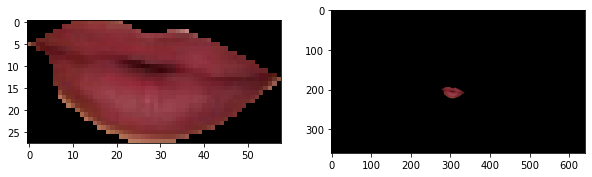

In [4]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
img_original = image.copy()
def create_box(img, points, ax, scale = 5, masked = False, cropped = True):
    if masked:
        mask = np.zeros_like(img)
        mask = cv.fillPoly(mask, [points], (255,255,255))
        img = cv.bitwise_and(img, mask)
        ax.imshow(img)
    if cropped:
        bbox = cv.boundingRect(points)
        x,y,w,h = bbox

        img_crop = img[y:y+h, x:x+w]
        img_crop = cv.resize(img_crop, (0,0), None , scale ,scale)
        return img_crop
    
    return mask

landmark_point = np.array(landmark_point)
#left_eye_image = create_box(img_original, landmark_point[36:42] )
img_lips = create_box(img_original, landmark_point[48:61], ax[1],1,masked = True)
ax[0].imshow(img_lips)
plt.show

# Coloring Lips

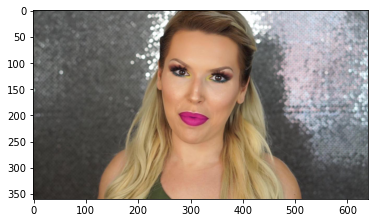

In [5]:
def create_box(img, points, scale = 5, masked = False, cropped = True):
    if masked:
        mask = np.zeros_like(img)
        mask = cv.fillPoly(mask, [points], (255,255,255))
        img = cv.bitwise_and(img, mask)

    if cropped:
        bbox = cv.boundingRect(points)
        x,y,w,h = bbox

        img_crop = img[y:y+h, x:x+w]
        img_crop = cv.resize(img_crop, (0,0), None , scale ,scale)
        return img_crop
    
    return mask

lip_mask = create_box(img_original, landmark_point[48:61], masked = True, cropped = False)
lip_color = np.zeros_like(lip_mask)
lip_color[:] = 153, 0 , 157

colored_lip = cv.bitwise_and(lip_mask, lip_color)
colored_lip = cv.GaussianBlur(colored_lip, (7,7), 10)
img_color_lip = cv.addWeighted(image, 1, colored_lip, 0.4, 0)

plt.imshow(img_color_lip)

# Creating Window

In [3]:
def facial_landmark(image):
    detector = dlib.get_frontal_face_detector()
    imgGray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    faces = detector(imgGray)
    predictor = dlib.shape_predictor('dataset/shape_predictor_68_face_landmarks.dat')

    landmark_point = []
    for face in faces:
        x1, y1 = face.left(), face.top()
        x2, y2 = face.right(), face.bottom()

        #img_original__ = cv.rectangle(img_original, (x1,y1), (x2, y2), (0, 255, 0), 2)
        landmarks = predictor(imgGray, face)
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmark_point.append((x,y))
            #cv.circle(img_original__, (x,y), 5, (50, 50 , 255), cv.FILLED)
            #cv.putText(img_original__, str(n), (x, y - 10), cv.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0, 0, 255), 1)

    return landmark_point

def create_box(img, points, scale = 5, masked = False, cropped = True):
    if masked:
        mask = np.zeros_like(img)
        mask = cv.fillPoly(mask, [points], (255,255,255))
        img = cv.bitwise_and(img, mask)

    if cropped:
        bbox = cv.boundingRect(points)
        x,y,w,h = bbox

        img_crop = img[y:y+h, x:x+w]
        img_crop = cv.resize(img_crop, (0,0), None , scale ,scale)
        return img_crop
        
    return mask

def color_lip(original_image,landmark_point,  b,g,r):
    lip_mask = create_box(original_image, landmark_point[48:61], masked = True, cropped = False)
    lip_color = np.zeros_like(lip_mask)
    lip_color[:] = b, g , r

    colored_lip = cv.bitwise_and(lip_mask, lip_color)
    colored_lip = cv.GaussianBlur(colored_lip, (7,7), 10)
    img_color_lip = cv.addWeighted(original_image, 1, colored_lip, 0.4, 0)
    return img_color_lip



def empty(a):
    pass


cv.namedWindow('Lip Color')
cv.resizeWindow("Lip Color", 640 , 250)
cv.createTrackbar("Blue", "Lip Color", 0, 255 ,empty)
cv.createTrackbar("Green", 'Lip Color', 0 , 255, empty)
cv.createTrackbar("Red", "Lip Color", 0 , 255, empty)

In [6]:
image_path = os.path.join(os.getcwd(), 'dataset','Lip_dataset','train_frames','train','00000007.jpg')
image = cv.imread(image_path)


landmark_point = np.array(facial_landmark(image))

while True:
    b = cv.getTrackbarPos("Blue", "Lip Color")
    g = cv.getTrackbarPos("Green", "Lip Color")
    r = cv.getTrackbarPos("Red", "Lip Color")


    image_lip_colored = color_lip(image,landmark_point,  b,g,r)
    cv.imshow('Lip Color',image_lip_colored)
    cv.waitKey(0)